<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro_sistema_de_recomendacao/intro_sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a sistemas de recomendação com Python

* Download do arquivo mais atualizado `ml-latest-small` [aqui](https://grouplens.org/datasets/movielens/latest/)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
uri1 = 'https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/intro_testes_estatisticos/movies.csv'
filmes = pd.read_csv(uri1)
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
uri2 = 'https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/intro_testes_estatisticos/ratings.csv'
notas = pd.read_csv(uri2)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
filmes['total_de_votos'] = notas.filmeId.value_counts()
filmes.sort_values(by='total_de_votos', ascending=False)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
32160,Twentieth Century (1934),Comedy,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN


In [7]:
filmes['nota_media'] = notas.groupby('filmeId').mean()['nota']
filmes.sort_values(by='nota_media', ascending=False)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN


In [8]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50').sort_values(by='nota_media', ascending=False)
filmes_com_mais_de_50_votos.head()

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041


In [9]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [10]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('generos == "Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values(by='nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


* Collaborative filtering;
* Content based filtering.

# Procurar usuários similares

* Distância Euclidiana

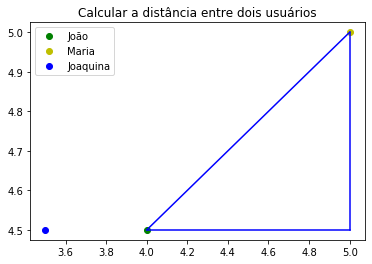

In [11]:
plt.plot(4, 4.5, 'go')
plt.plot(5,5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calcular a distância entre dois usuários')

plt.plot([4, 5], [4.5, 4.5], linestyle='-', color='b')
plt.plot([4, 5], [4.5, 5], linestyle='-', color='b')
plt.plot([5, 5], [4.5, 5], linestyle='-', color='b')

In [12]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])
joaquina = np.array([3.5, 4.5])
joao - maria

array([-1. , -0.5])

In [13]:
def pitagoras(a,b):
  (delta_x, delta_y) = a-b
  return math.sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

# Distância entre usuários

In [14]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

print(pitagoras(joao,maria))
print(pitagoras(joao,joaquina))

1.118033988749895
0.5


In [0]:
def notas_do_usuario(user):
  notas_do_usuario = notas.query('usuarioId == %d' % user)
  notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
  return notas_do_usuario

usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [16]:
diferencas = usuario1.join(usuario4, lsuffix='_esq', rsuffix='_dir').dropna()
distancia_de_vetores(diferencas['nota_esq'], diferencas['nota_dir'])


11.135528725660043

In [21]:
def distancia_de_user(user_id1, user_id2):
  notas1 = notas_do_usuario(user_id1)
  notas2 = notas_do_usuario(user_id2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()
  distancia = distancia_de_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
  return user_id1, user_id2, distancia

print(distancia_de_user(1, 4))

(1, 4, 11.135528725660043)


* É preciso interar sobre todos os usuários para saber quais estão próximos de um em específico.

In [28]:
n_usuarios = len(notas['usuarioId'].unique())
voce_id = 1
def distancia_de_todos(voce_id):
  distancias = [distancia_de_user(voce_id, user_id) for user_id in notas['usuarioId'].unique()]
  df_distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return df_distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [31]:
df = distancia_de_todos(1)
df.query('distancia == 0')

,voce,outra_pessoa,distancia
0,1,1,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
252,1,253,0.0
290,1,291,0.0
305,1,306,0.0
396,1,397,0.0
495,1,496,0.0
505,1,506,0.0


# Usuarios sem filmes em comum são colocados bem distante um do outro

In [0]:
def distancia_de_user(user_id1, user_id2, minimo=5):
  notas1 = notas_do_usuario(user_id1)
  notas2 = notas_do_usuario(user_id2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()
  # Usuarios com nada em comum
  if (diferencas.shape[0] < minimo):
    return [user_id1, user_id2, 100000]
  distancia = distancia_de_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
  return user_id1, user_id2, distancia

In [45]:
df = distancia_de_todos(1)
df.query('distancia == 0')

,voce,outra_pessoa,distancia
0,1,1,0.0
76,1,77,0.0


In [36]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

mais_proximos_de(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000


In [47]:
  notas1 = notas_do_usuario(1)
  notas2 = notas_do_usuario(77)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()
  diferencas

,nota_esq,nota_dir
filmeId,,
260,5.0,5.0
1196,5.0,5.0
1198,5.0,5.0
1210,5.0,5.0
2571,5.0,5.0
3578,5.0,5.0


# Parâmetros para teste

In [0]:
def distancia_de_user(user_id1, user_id2, minimo=5):
  notas1 = notas_do_usuario(user_id1)
  notas2 = notas_do_usuario(user_id2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()
  # Usuarios com nada em comum
  if (diferencas.shape[0] < minimo):
    return None
  distancia = distancia_de_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
  return user_id1, user_id2, distancia

def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar=None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_user(voce_id, user_id) for user_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  df_distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return df_distancias

def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [78]:
def sugere_para(voce, numero_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(1, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# Sugerindo baseado em vários usuários

In [80]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(n_mais_proximos)

mais_proximos_de(1, n_mais_proximos=2, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [0]:
def sugere_para(voce, n_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(1, n_mais_proximos=n_mais_proximos, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes).head()

In [96]:
voce = 1
numero_de_usuarios_a_analisar = 50
n_mais_proximos = 10 

sugere_para(1).head()


,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


In [113]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

def sugere_para(voce, k_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(1, k_mais_proximos=k_mais_proximos, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes).head()

sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
56174,5.0,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX,62.0,3.483871
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
1197,5.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500


# Testar um usuário novo

In [99]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [0]:
def novo_usuario(dados, notas):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=['filmeId', 'nota'])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])


In [102]:
notas_novo = novo_usuario([
           [122904,2], [1246,5], [2529,2], [2329,5], [2324,5], [1,2], [7,0.5], [2,2], [1196,1], [260,1]
], notas)
notas_novo.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,filmeId,momento,nota,usuarioId
5,1,NaN,2.0,611
6,7,NaN,0.5,611
7,2,NaN,2.0,611
8,1196,NaN,1.0,611
9,260,NaN,1.0,611


In [104]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


# Utilizar somente as notas de filmes com mais de 50 votos

In [107]:
notas = notas.set_index('filmeId').loc[filmes_com_mais_de_50_votos.index]


KeyError: ignored

In [108]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,318,2,3.0,1445714835
1,318,5,3.0,847434880
2,318,6,5.0,845553200
3,318,8,5.0,839463489
4,318,11,4.0,902155070


In [109]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
56174,5.0,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX,62.0,3.483871
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
1197,5.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500


In [0]:
def sugere_para(voce, k_mais_proximos=10, numero_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(1, k_mais_proximos=k_mais_proximos, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]
  recomendacoes = recomendacoes.join(aparicoes, lsuffix='_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
  filtro_minimo = k_mais_proximos / 2.0
  recomendacoes = recomendacoes.query('nota_aparicoes_nos_usuarios >= %.2f' % filtro_minimo)
  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors='ignore')
  return recomendacoes.join(filmes)

In [138]:
sugere_para(611).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
2571,4.916667,6,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
7153,4.750000,6,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.750000,6,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.714286,7,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
2959,4.583333,6,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
527,4.571429,7,Schindler's List (1993),Drama|War,220.0,4.225000
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


In [139]:
sugere_para(611, k_mais_proximos=20).head(10)


,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
527,4.727273,11,Schindler's List (1993),Drama|War,220.0,4.225000
2571,4.700000,10,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
318,4.590909,11,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
